In [ ]:
# At every level, the filtering and subsampling will result in half the number of samples
# hence, half the time resolution but half the frequency band spanned, hence double the freq resolution

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn.svm import SVC, OneClassSVM
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.model_selection import StratifiedKFold, GridSearchCV, ParameterGrid
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.pipeline import Pipeline
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib
from mpl_toolkits.mplot3d import Axes3D #, axes3d

import pywt


In [2]:
datapath = 'data/'
prefeatfile = datapath + 'newprefeatures_trans_1024_1_10_20000.npz'
newprefeat = np.load(prefeatfile, encoding = 'latin1')['newprefeat']
print (newprefeat.shape,":",[p.shape for p in newprefeat])


(49,) : [(2478, 3), (2478, 3), (2476, 3), (2464, 3), (1264, 3), (3889, 3), (2092, 3), (2019, 3), (3896, 3), (6116, 3), (6073, 3), (2447, 3), (2440, 3), (2440, 3), (2440, 3), (2440, 3), (2440, 3), (2440, 3), (2440, 3), (2440, 3), (2440, 3), (2440, 3), (2440, 3), (2440, 3), (2440, 3), (2440, 3), (2440, 3), (2440, 3), (39998, 3), (39974, 3), (39984, 3), (39832, 3), (39926, 3), (39876, 3), (23980, 3), (20980, 3), (20480, 3), (20480, 3), (23480, 3), (23980, 3), (23980, 3), (23980, 3), (23980, 3), (23980, 3), (23980, 3), (26980, 3), (27480, 3), (27480, 3), (27480, 3)]


In [3]:
scl = MinMaxScaler(feature_range= (0,1))
newprefeat = [scl.fit_transform(newprefeat[i] )for i in range(len(newprefeat))]

In [6]:
from_r = 0
# to_r = 1500
level = 17
nprefeat = []
for d_ind, d in enumerate(newprefeat):
    X = d[from_r:,:2]
    y = d[from_r:,2]
    npre = np.zeros_like(X)
    for n_axis in range(X.shape[1]):
        npre_tot, freq = pywt.cwt(X[:,n_axis], np.arange(1,50), 'gaus1') # coef = (lvls) x (intances)
        npre[:,n_axis] = npre_tot[level,:]
#     print(coef.shape, y.shape)
    npre = np.concatenate((npre,y[:,np.newaxis]), axis = 1)
    nprefeat.append(npre)

IndexError: list index out of range

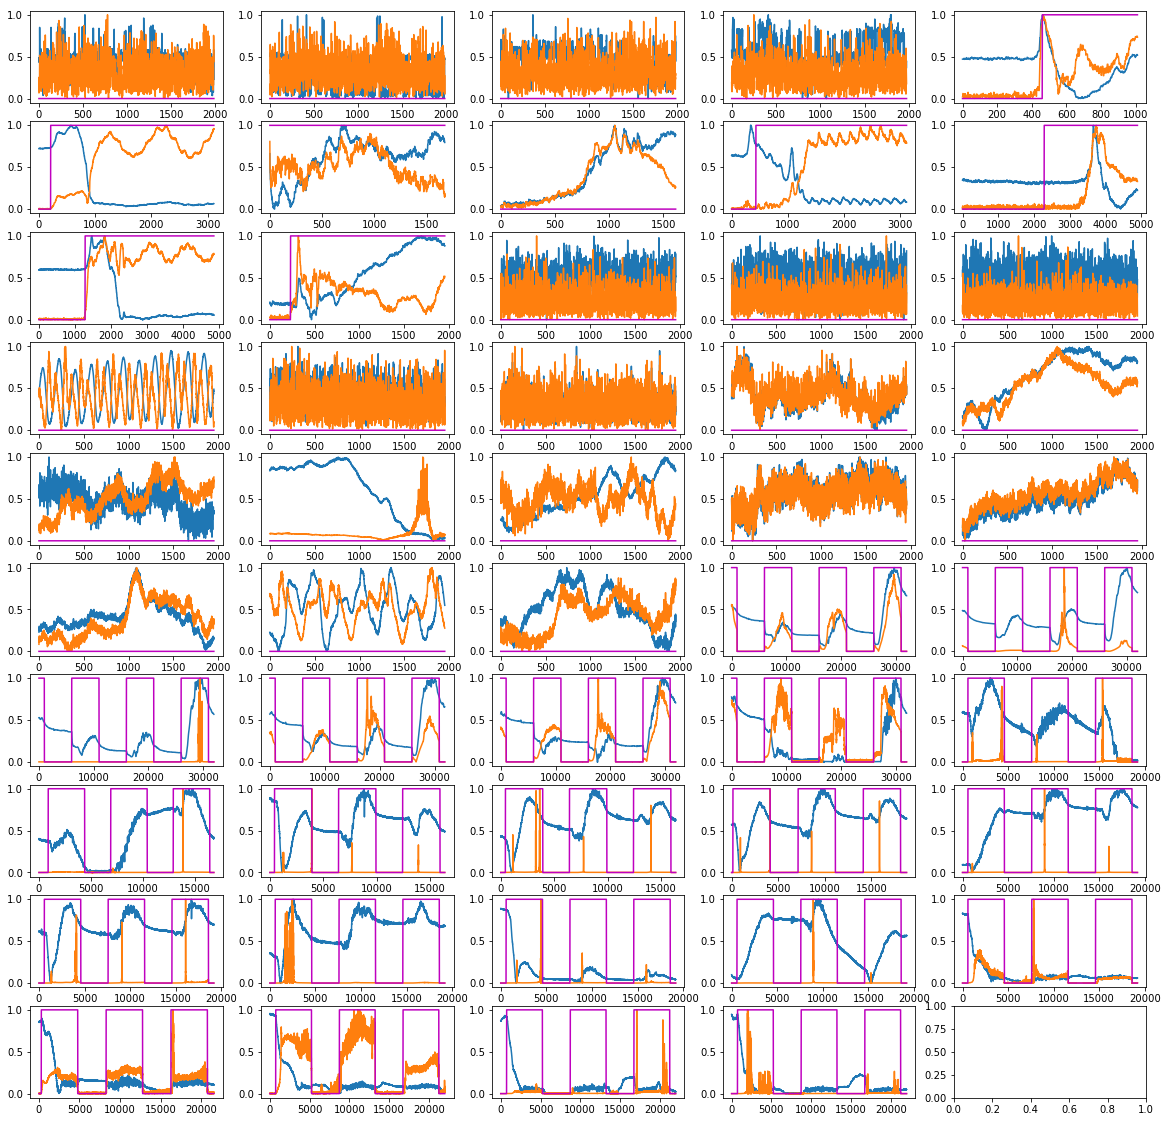

In [29]:
x = [newprefeat[i][:,:2] for i in range(len(newprefeat))] #np.arange(11)
y = [newprefeat[i][:,2] for i in range(len(newprefeat))] # np.random.rand(len(x), 50)*10
from_r = [int(np.ceil(0.1*newprefeat[i].shape[0])) for i in range(len(newprefeat))]
to_r = [int(np.ceil(0.9*newprefeat[i].shape[0])) for i in range(len(newprefeat))]

fig, axes = plt.subplots(10,5, sharex=False, sharey=False, figsize = (20,20))

for i, ax in enumerate(axes.flatten()):
    ax.plot(x[i][from_r[i]:to_r[i],:])
    ax.hold
    ax.plot((y[i][from_r[i]:to_r[i]])*np.amax(x[i][from_r[i]:to_r[i],:]),'m') #color=plt.cm.Paired(i/50.)
#     ax.plot(x[i])
#     ax.hold
#     ax.plot(y[i],'m') #color=plt.cm.Paired(i/50.)

plt.show()

IndexError: list index out of range

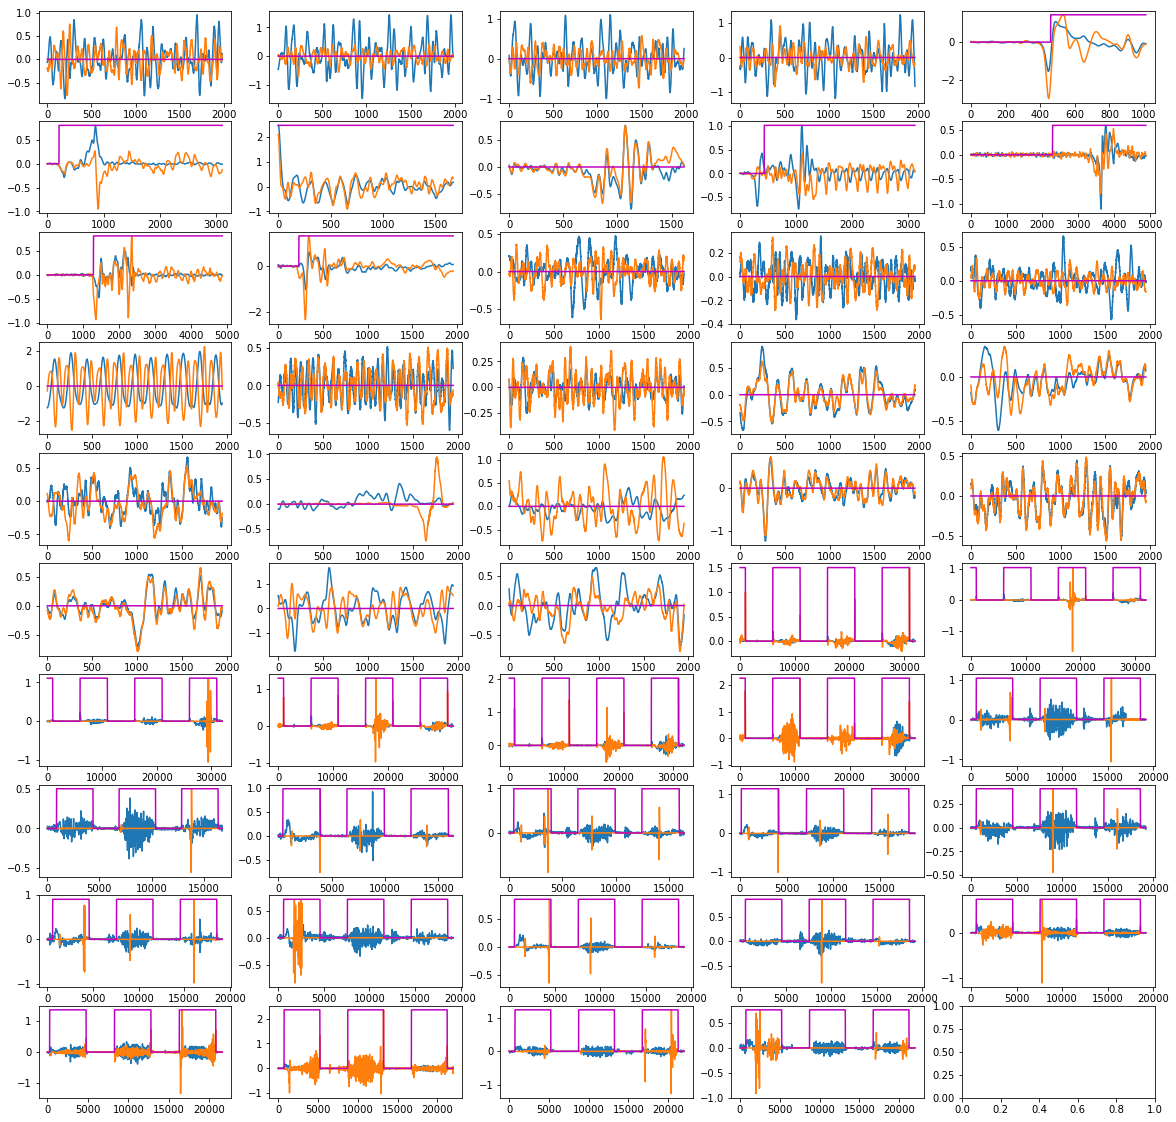

In [30]:
x = [nprefeat[i][:,:2] for i in range(len(nprefeat))] #np.arange(11)
# scl = MinMaxScaler(feature_range=(0,1))
# x = [scl.fit_transform(x[i] )for i in range(len(nprefeat))]
y = [nprefeat[i][:,2] for i in range(len(nprefeat))] # np.random.rand(len(x), 50)*10
from_r = [int(np.ceil(0.1*nprefeat[i].shape[0])) for i in range(len(nprefeat))]
to_r = [int(np.ceil(0.9*nprefeat[i].shape[0])) for i in range(len(nprefeat))]

fig, axes = plt.subplots(10,5, sharex=False, sharey=False, figsize = (20,20))

for i, ax in enumerate(axes.flatten()):
    ax.plot(x[i][from_r[i]:to_r[i],:])
    ax.hold
    ax.plot((y[i][from_r[i]:to_r[i]])*np.amax(x[i][from_r[i]:to_r[i],:]),'m') #color=plt.cm.Paired(i/50.)
#     ax.plot(x[i])
#     ax.hold
#     ax.plot(y[i],'m') #color=plt.cm.Paired(i/50.)

plt.show()

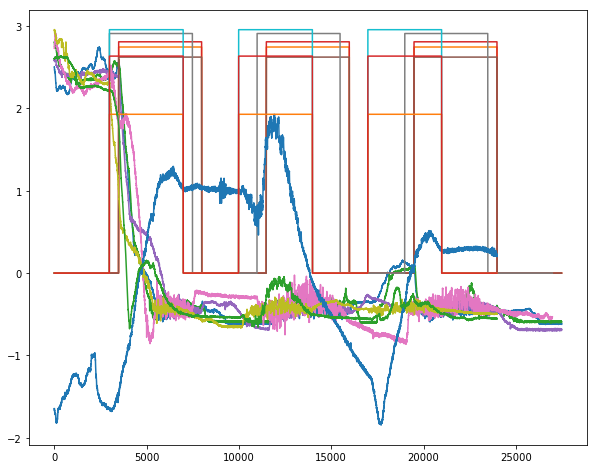

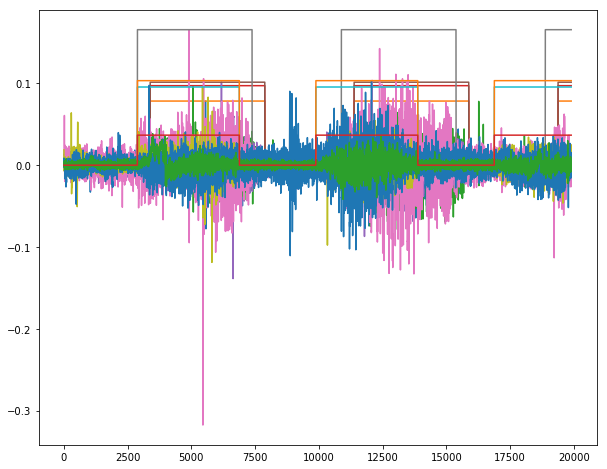

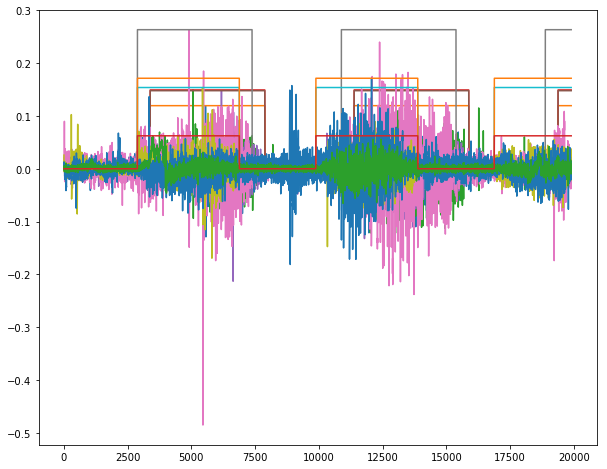

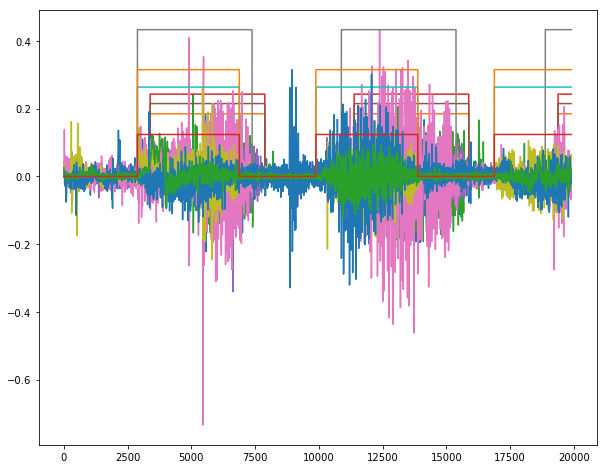

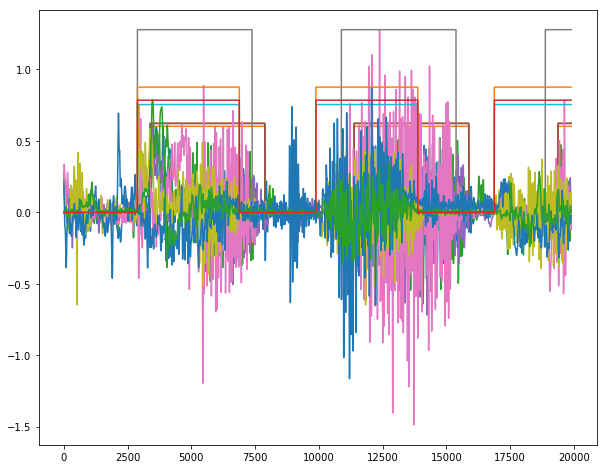

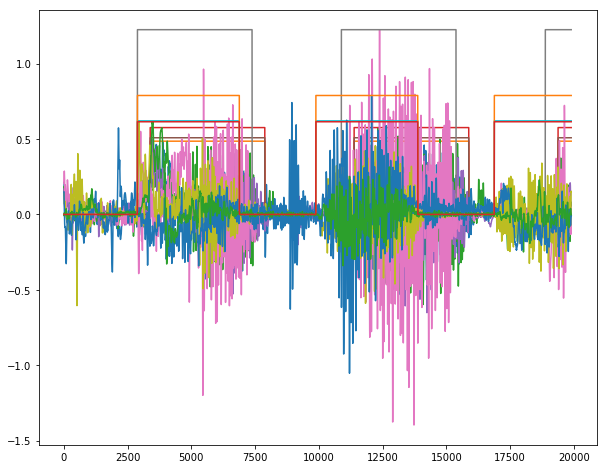

In [6]:
lvls = [1,2,4,15,18]
temp_data = newprefeat[-1:-8:-1]
from_r = 100
to_r = 25000
to_r2 = 20000
col = 0
for i in range(temp_data.shape[0]):
    temp_x = temp_data[i]
    
    temp_y = temp_x[:,2]
    temp_x = temp_x[:,:2]
    temp_x = StandardScaler().fit_transform(temp_x)
    plt.figure(0,figsize=(10,8))
    plt.plot(range(0,temp_x.shape[0],1), temp_x[:,col])
    plt.hold
    plt.plot(temp_y*np.amax(temp_x[:,col]))
    coef, freqs=pywt.cwt(temp_x[:,col],np.arange(1,129),'gaus1')
    for j in lvls:
        n_max = np.amax(coef[j,from_r:to_r2])
        plt.figure(j,figsize=(10,8))
        plt.plot(range(coef[j,from_r:to_r2].shape[0]),coef[j,from_r:to_r2])
        plt.hold
        plt.plot(temp_y[from_r:to_r2]*n_max)

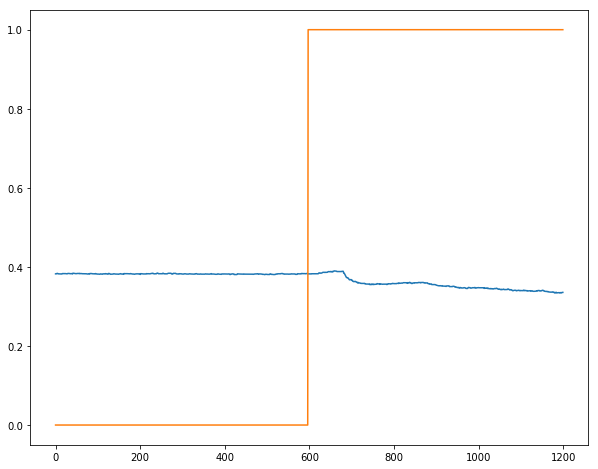

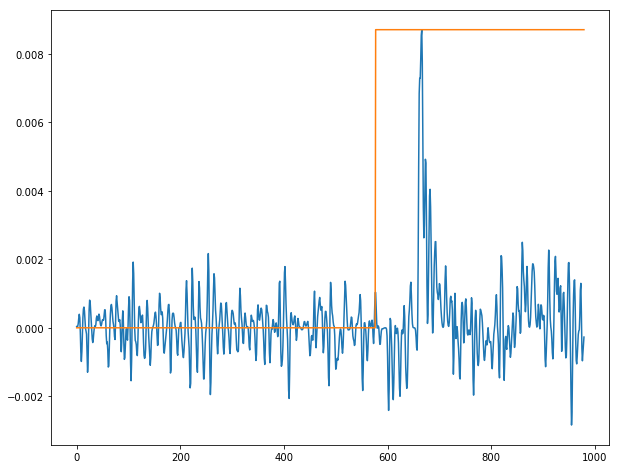

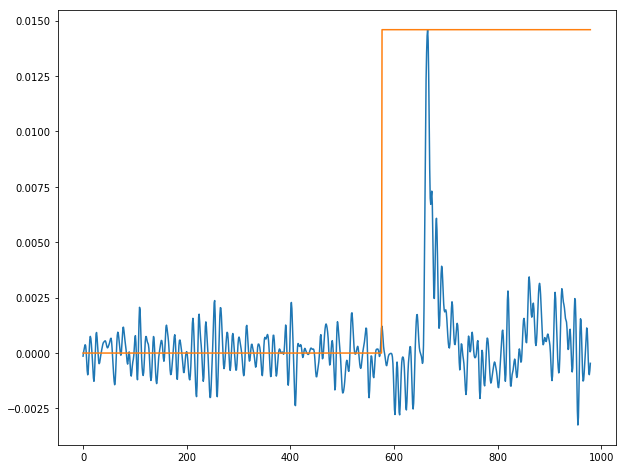

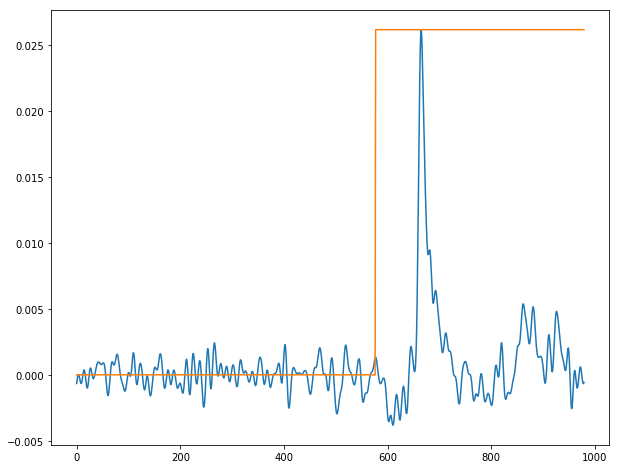

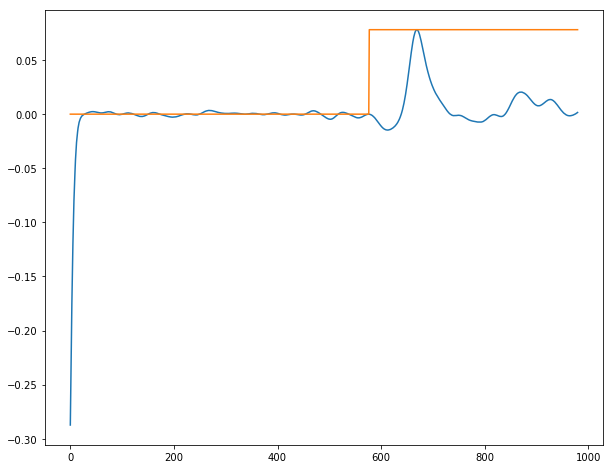

In [121]:
lvls = [1,2,4,15]
# temp_data = newprefeat[-1:-4:-1]
temp_data = newprefeat[5:6]
from_r = 20
to_r = 1200
to_r2 = 1000
# temp_data = np.concatenate((temp_data1,temp_data2),axis = 0)
# temp_y = temp_data[1][:,2]
for i in range(temp_data.shape[0]):
    temp_x = temp_data[i]
#     temp_x = StandardScaler().fit_transform(temp_x)
    temp_y = temp_x[:to_r,2]
    temp_x = temp_x[:to_r,:2]
    plt.figure(0,figsize=(10,8))
    plt.plot(range(0,temp_x.shape[0],1), temp_x[:to_r,0])
    plt.hold
    plt.plot(temp_y)
    
    coef, freqs=pywt.cwt(temp_x[:to_r,0],np.arange(1,129),'gaus1')
    for j in lvls:
        n_max = np.amax(coef[j,from_r:to_r2])
        plt.figure(j,figsize=(10,8))
        plt.plot(range(coef[j,from_r:to_r2].shape[0]),coef[j,from_r:to_r2])
        plt.hold
        plt.plot(temp_y[from_r:to_r2]*n_max)

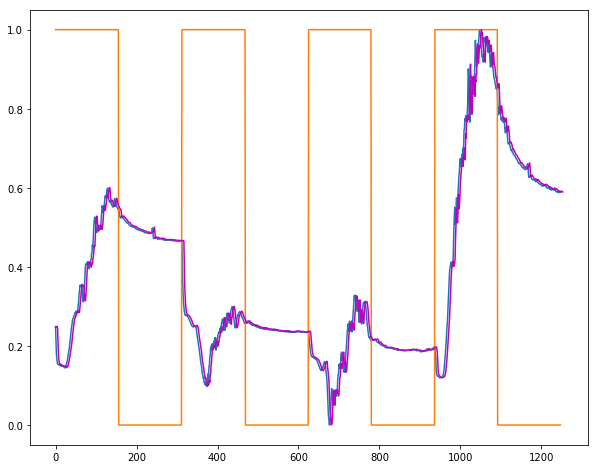

In [24]:
from pywt import wavedec, downcoef
temp_data = newprefeat[32:33]
decomp_level = 5
# temp_data = np.concatenate((temp_data1,temp_data2),axis = 0)
# temp_y = temp_data[1][:,2]
for i in range(len(temp_data)):
    temp_x = temp_data[i]
#     temp_x = StandardScaler().fit_transform(temp_x)
#     cA, cD = pywt.wavedec(temp_x[:,0], 'db4')  
    cA = pywt.downcoef(part = 'a',data = temp_x[:,0], wavelet = 'db4', level = decomp_level)
#     print(temp_x.shape, cD.shape, cA.shape)
    temp_y = temp_x[:,2]
    temp_x = temp_x[:,:2]
    plt.figure(0,figsize=(10,8))
    plt.plot(temp_x[::32,0])
    plt.hold
    plt.plot(temp_y[::32])
    plt.plot(cA/np.amax(cA),'m')
    
    

#     n_max = np.amax(cD)
#     plt.figure(1,figsize=(10,8))
#     plt.plot(cD)
#     plt.hold
#     plt.plot(temp_y[::2]*n_max)
    
#     plt.figure(2,figsize=(10,8))
#     plt.plot(cA)
    
# # cA, cD = pywt.dwt(temp_x, wavelet=w, mode='constant')
# print(cA.shape, cD.shape, temp_x.shape)
# t = range(0,len(cA),1)
# plt.figure(0)
# plt.plot(t,cA,range(0,temp_x.shape[0],1), temp_x[:,0])
# # plt.figure(1)
# # plt.plot(cA,cD)
# plt.figure(2)
# plt.plot(t,cD)